<a href="https://colab.research.google.com/github/Paolino1994/Vision-por-computadora/blob/main/TP1/TP1_VPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

#Parte 1

In [ ]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('wp_red.png')

# Como lucen los datos en un np.array
print(img.shape)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
#print(img)

(813, 481, 3)
Tamaño imagen: (813, 481, 3) pix


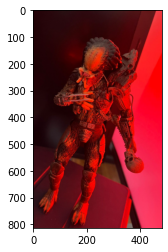

In [ ]:
image = cv.cvtColor(img, cv.COLOR_BGR2RGB )
plt.imshow(image)
plt.show()

In [ ]:
def coord_cromaticas(image):
  
  cols=image.shape[0]
  rows=image.shape[1]  
  im2=np.divide(image,np.array([np.sum(image,axis = 2),np.sum(image,axis = 2),np.sum(image,axis = 2)]).reshape(cols,rows,3))
  return im2
    


In [ ]:
def white_patch(im):
  image = im.copy()
  
  maxRed=max(image[:,:,0].flatten())
  maxGreen=max(image[:,:,1].flatten())
  maxBlue=max(image[:,:,2].flatten())
  print(maxRed,maxGreen,maxBlue)
  image[:,:,0]=image[:,:,0]*(255/maxRed)
  image[:,:,1]=image[:,:,1]*(255/maxGreen)
  image[:,:,2]=image[:,:,2]*(255/maxBlue)
  return image
  




In [ ]:
im2=white_patch(image)


255 134 122


255 134 122


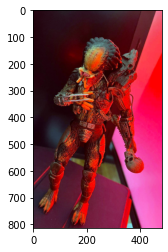

In [ ]:

plt.imshow(white_patch(image))
plt.show()

#Parte 2



In [ ]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)

img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)


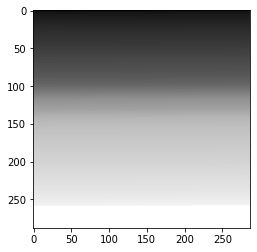

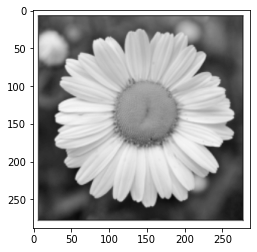

In [ ]:
plt.imshow(img1,cmap='gray')
plt.show()
plt.imshow(img2,cmap='gray')
plt.show()

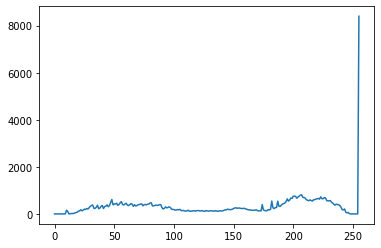

In [ ]:
histr=cv.calcHist([img1],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

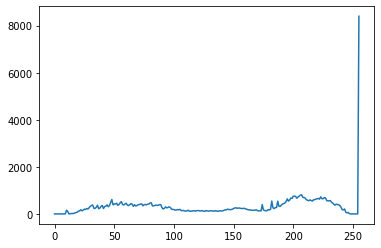

In [ ]:
histr=cv.calcHist([img2],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

Como ambos histogramas son iguales significa que las imagenes son practicamente iguales, pero los pixeles estan en diferente orden, lo caul no me aportaria nada para un modelo de ML

In [ ]:
segmentacion = cv.imread('segmentacion.png')
segmentacion = cv.cvtColor(segmentacion, cv.COLOR_BGR2RGB )

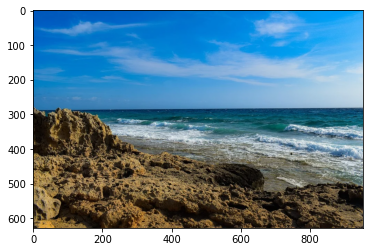

In [ ]:
plt.imshow(segmentacion)
plt.show()

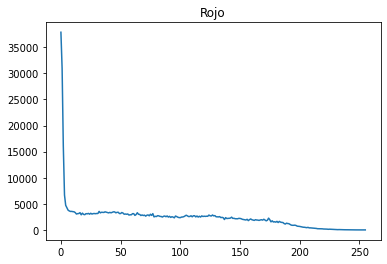

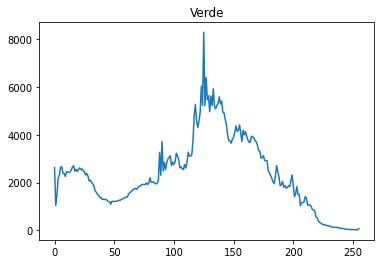

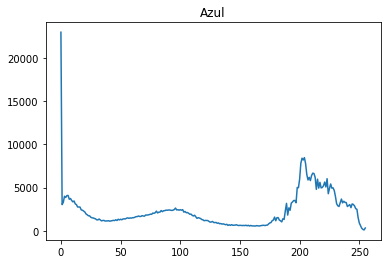

In [ ]:
#Rojo
histr=cv.calcHist([segmentacion[:,:,0]],[0],None,[256],[0,256]) 
plt.title("Rojo")
plt.plot(histr)
plt.show()
#Verde
histr=cv.calcHist([segmentacion[:,:,1]],[0],None,[256],[0,256]) 
plt.title("Verde")
plt.plot(histr)
plt.show()
#Azul
plt.title("Azul")
histr=cv.calcHist([segmentacion[:,:,2]],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.show()

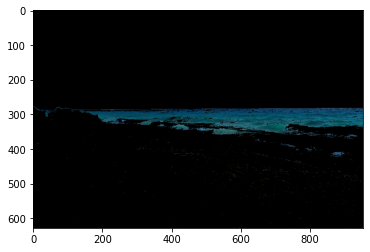

In [ ]:
#Agua
color_l = (0, 50, 0)
color_u = (60, 255, 160)

mask = cv.inRange(segmentacion, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()


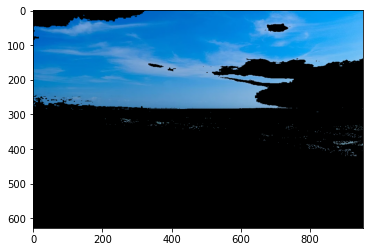

In [ ]:
#Cielo
color_l = (0, 100, 180)
color_u = (130, 225, 255)

mask = cv.inRange(segmentacion, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()


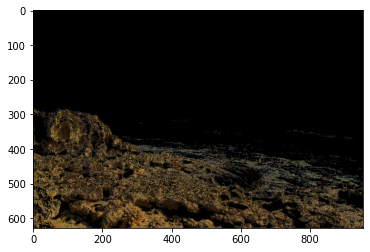

In [ ]:
#Tierra
color_l = (30, 0, 0)
color_u = (255, 150, 90)

mask = cv.inRange(segmentacion, color_l,  color_u)
img_segmentada = cv.bitwise_and(segmentacion, segmentacion, mask=mask)
plt.imshow(img_segmentada)
plt.show()
